In [2]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 3.4 MB/s eta 0:00:00:00:0100:01


In [5]:
from numpy import *
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,8)
plt.rcParams["figure.dpi"] = 300
plt.rcParams["font.size"] = 15

from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
import optuna

import warnings
import pickle
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import mplcatppuccin
import matplotlib as mpl
mpl.style.use(["ggplot", "mocha"])

In [6]:
# The directory for top level folder
dir_ = "/home/sugam/Work/20-29 Deep Learning/22 Projects/Optimization of Energy Using AIML"

processed_data_dir = dir_+'/data/Processed/'
model_dir = dir_+'/models/'
report_dir = dir_ + "/reports/figures/"

In [7]:
target_columns = "load"

In [8]:
# Load your dataset
train_data =  pd.read_csv(processed_data_dir + "train.csv")
validation_data =  pd.read_csv(processed_data_dir + "validation.csv")
test_data =  pd.read_csv(processed_data_dir + "test.csv")

In [9]:
train_data = pd.concat([train_data,validation_data],axis=0)
del validation_data

In [10]:
X_train, y_train = train_data.drop(target_columns, axis=1), train_data[target_columns]
X_test, y_test = test_data.drop(target_columns, axis=1), test_data[target_columns]

In [11]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

print(f"Shape of Train data: {X_train_scaled.shape}")
print(f"Shape of Test data: {X_test_scaled.shape}")

Shape of Train data: (92742, 50)
Shape of Test data: (10305, 50)


In [12]:
##########################BASE XGBoost Model
random.seed(1234)
xgb_model = XGBRegressor(n_jobs=-1)
xgb_model.fit(X_train_scaled, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
model_name = model_dir+'xgb_base.bin'
pickle.dump(xgb_model, open(model_name, 'wb'))

In [14]:
with open(model_name, 'rb') as file:  
    xgb_base = pickle.load(file)

In [15]:
xgb_predictions_train = xgb_base.predict(X_train_scaled)
xgb_predictions_test = xgb_base.predict(X_test_scaled)


# Calculate RMSE for Random Forest
xgb_rmse_train = mean_squared_error(y_train, xgb_predictions_train, squared=False)
print("XGBoost RMSE for Train data :", xgb_rmse_train)

xgb_rmse_test = mean_squared_error(y_test, xgb_predictions_test, squared=False)
print("XGBoost RMSE for Test data :", xgb_rmse_test)

XGBoost RMSE for Train data : 1.2692842201125643
XGBoost RMSE for Test data : 2.7715220316203077


In [19]:
# def objective(trial):
#     """
#     This is an objective function of optuna library where we search the parameter of XGBRegressor

#     ------ Do not run this function again-----------

#     Returns:
#       rmse_score (float) - the score on how each model performed
#     """
#     criterion = trial.suggest_categorical("criterion",["gini","entropy"])
#     max_depth = trial.suggest_int("max_depth",2,32,log=True)
#     n_estimators = trial.suggest_int("n_estimators",100,500)
#     boosters = trial.suggest_categorical("boosters",["gbtree","gblinear","dart"])
#     eta = trial.suggest_float("eta",0.1,1)
#     learning_rate = trial.suggest_float("learning_rate",0.001,1,log=True)
#     min_child_weight = trial.suggest_int("min_child_weight",1,10)
#     gamma = trial.suggest_float("gamma",0.0,0.5)
    
#     xgb_model = XGBRegressor(criterion = criterion,
#                             max_depth = max_depth,
#                             n_estimator = n_estimators,
#                             verbosity=1,
#                             boosters = boosters,
#                             eta = eta,
#                             learning_rate = learning_rate,
#                             min_child_weight = min_child_weight,
#                             gamma = gamma)
    
#     xgb_model.fit(X_train,y_train)
#     rmse_score = mean_squared_error(y_train,xgb_model.predict(X_train),squared=False)
#     return rmse_score


# study = optuna.create_study(direction="minimize",
#                             study_name="xgb_study")
# study.optimize(objective, n_trials=20)
# trial = study.best_trial
# print(f"RMSE: {trial.value}")
# print(f"Params: {trial.params}")

In [16]:
random.seed(1234)
xgb_model = XGBRegressor(criterion='entropy',
                         max_depth =  18,
                         n_estimators = 173,
                         boosters = 'gblinear',
                         eta = 0.8321535613093416, 
                         learning_rate = 0.9327551352534427,
                         min_child_weight = 5,
                         gamma = 0.0014464638207411923
                        )

xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, boosters='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, criterion='entropy', device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eta=0.8321535613093416, eval_metric=None, feature_types=None,
             gamma=0.0014464638207411923, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.9327551352534427, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=18, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=173, ...)

In [17]:
model_name = model_dir+'xgb_final.bin'
pickle.dump(xgb_model, open(model_name, 'wb'))

In [18]:
with open(model_name, 'rb') as file:  
    xgb_final = pickle.load(file)

In [19]:
xgb_predictions_training = xgb_final.predict(X_train_scaled)
xgb_predictions_testing = xgb_final.predict(X_test_scaled)

xgb_rmse_training = mean_squared_error(y_train, xgb_predictions_training, squared=False)
xgb_rmse_testing = mean_squared_error(y_test, xgb_predictions_testing, squared=False)
print(f'Training RMSE: {xgb_rmse_training}')
print(f'Testing RMSE: {xgb_rmse_testing}')

Training RMSE: 0.022586741285466946
Testing RMSE: 4.426307328552701


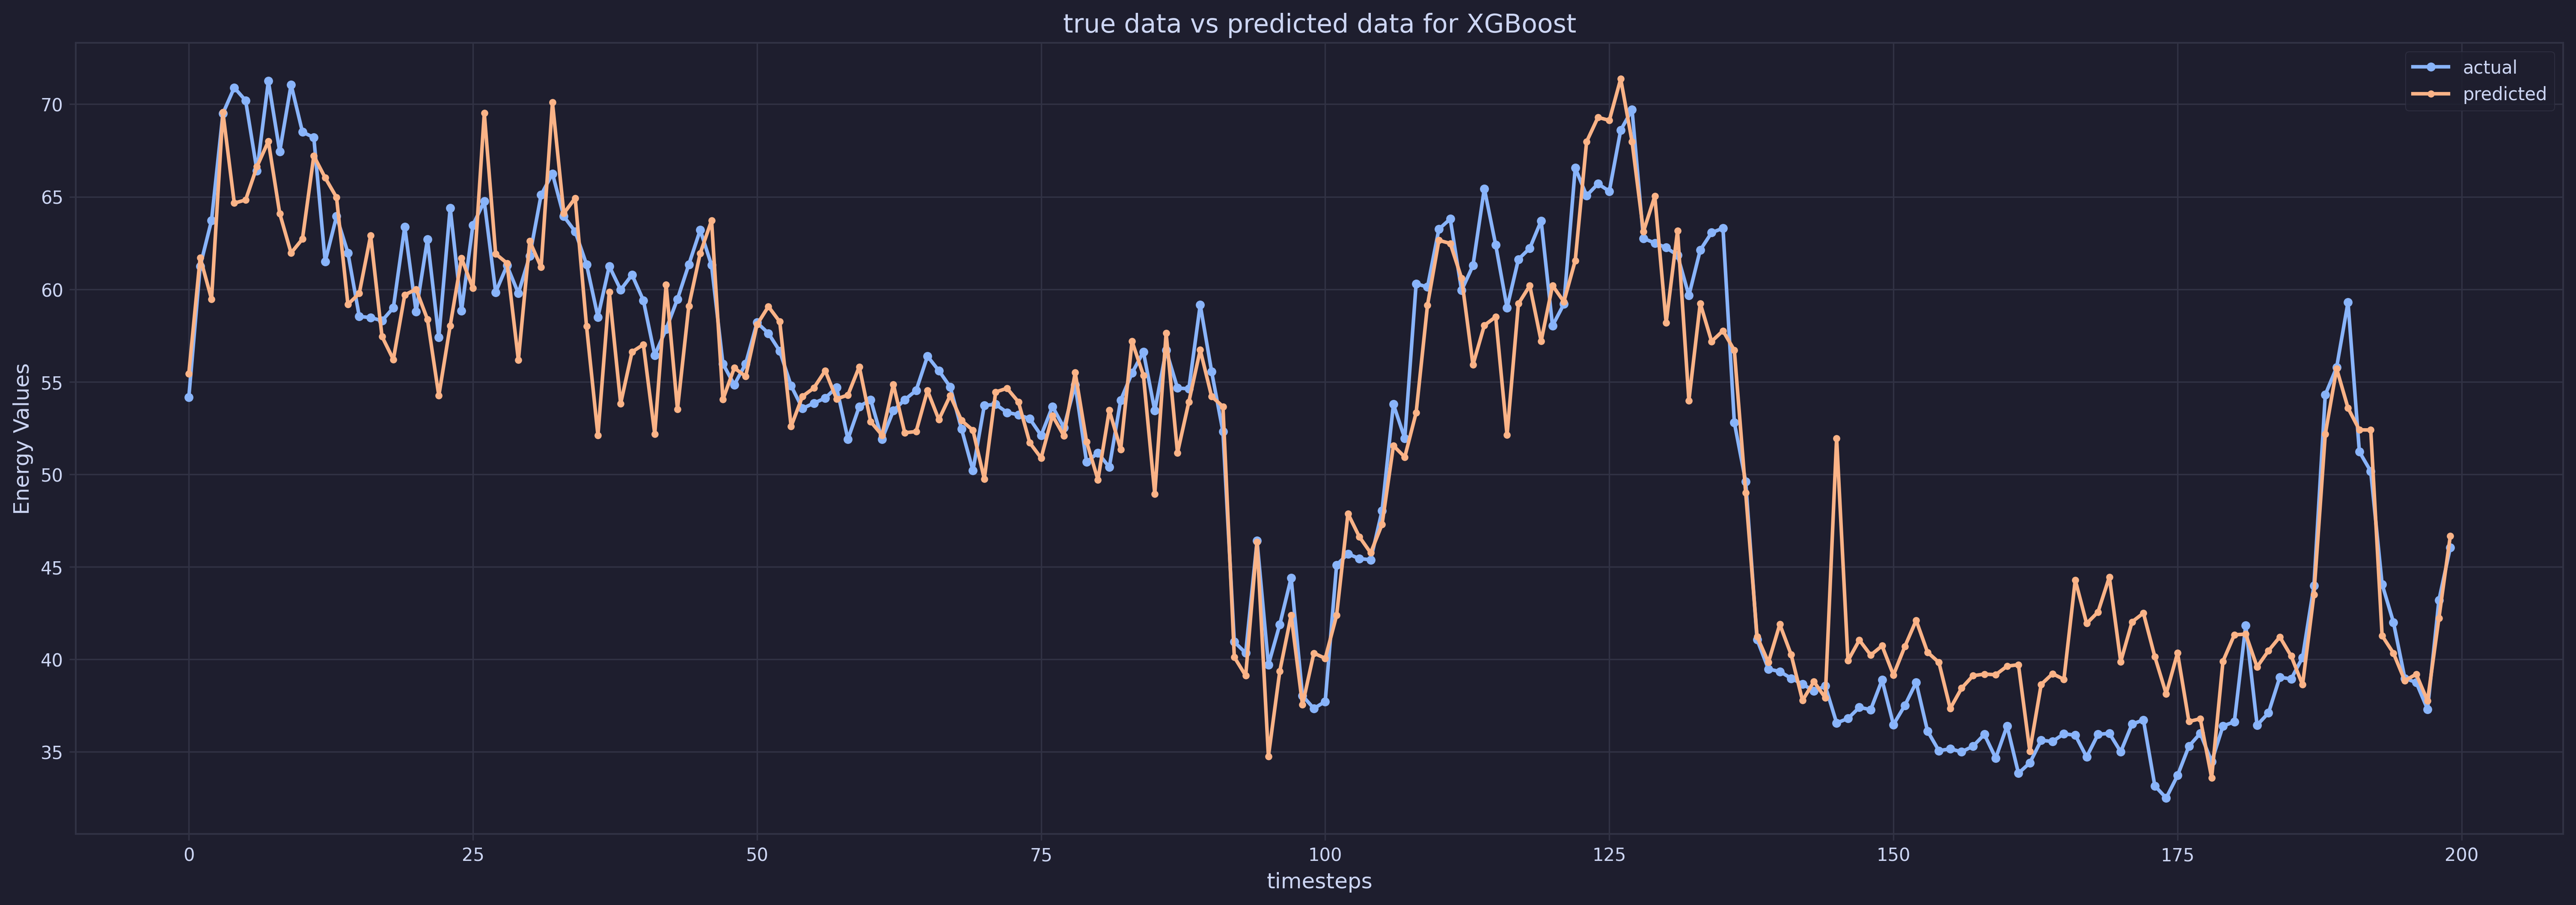

In [20]:
fig = plt.figure(figsize=(25,8))
plt.plot(y_test.values[:200], linewidth=2, marker = 'o', ms=4)
plt.plot(xgb_predictions_testing[:200], linewidth=2, marker = 'o', ms=3)
plt.legend(["actual","predicted"])
plt.title("true data vs predicted data for XGBoost")
plt.xlabel("timesteps")
plt.ylabel("Energy Values")

plt.savefig(report_dir + "xgboost_test_line_graph.jpg", 
            dpi=500,
            format=None,
            transparent=False,
            bbox_inches=None, 
            pad_inches=0.1)